## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-006-003-Clustering-K-Means-02

In [1]:
sfeature=['F01', 'F02', 'F03', 'F04']

## Part A - Load Libraries

In [2]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(1968)

## Part B - Load the Roses dataset

In [3]:
fileName = '../../Data/Roses02.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Roses02.csv


In [4]:
datadf= pd.read_csv(fileFullName, header=0)
print(datadf.shape)
print(datadf.columns)

(600, 6)
Index(['F01', 'F02', 'F03', 'F04', 'T01', 'T02'], dtype='object')


In [5]:
X = datadf[sfeature].copy(deep=True)
X.shape

(600, 4)

In [6]:
y = datadf['T01'].copy(deep=True)
y.columns = (['T'])

## Part C - Build range of KMeans Estimators

In [7]:
estimators = [
              ('k_means_rose_16', KMeans(n_clusters=16, verbose=True, random_state=0, n_jobs=-1)),
              ('k_means_rose_12', KMeans(n_clusters=12, verbose=True, random_state=0, n_jobs=-1)),
              ('k_means_rose_08', KMeans(n_clusters=8, verbose=True, random_state=0, n_jobs=-1)),
              ('k_means_rose_05', KMeans(n_clusters=5, verbose=True, random_state=0, n_jobs=-1)),
              ('k_means_rose_03', KMeans(n_clusters=3, verbose=True, random_state=0, n_jobs=-1)),
              ('k_means_rose_02', KMeans(n_clusters=2, verbose=True, random_state=0, n_jobs=-1))
            ]

In [25]:
for name, est in estimators:
    print('='*80)
    print('Name : %s' % (name))
    print('-'*30)
    print(est.get_params(deep=True))
    print('='*80)

Name : k_means_rose_16
------------------------------
{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 16, 'n_init': 10, 'n_jobs': -1, 'precompute_distances': 'auto', 'random_state': 0, 'tol': 0.0001, 'verbose': True}
Name : k_means_rose_12
------------------------------
{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 12, 'n_init': 10, 'n_jobs': -1, 'precompute_distances': 'auto', 'random_state': 0, 'tol': 0.0001, 'verbose': True}
Name : k_means_rose_08
------------------------------
{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 8, 'n_init': 10, 'n_jobs': -1, 'precompute_distances': 'auto', 'random_state': 0, 'tol': 0.0001, 'verbose': True}
Name : k_means_rose_05
------------------------------
{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 10, 'n_jobs': -1, 'precompute_distances': 'auto', 'random_state': 0

## Part D - Plot Results

In [8]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06


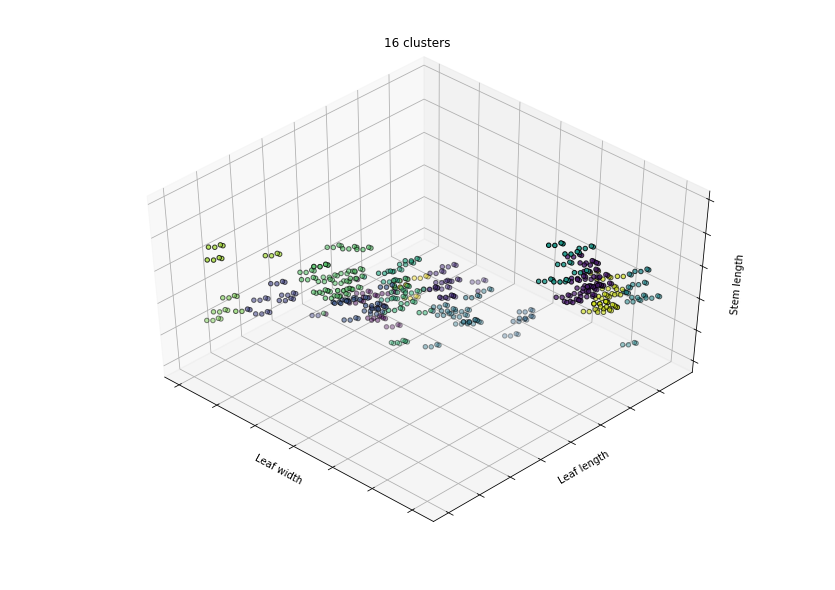

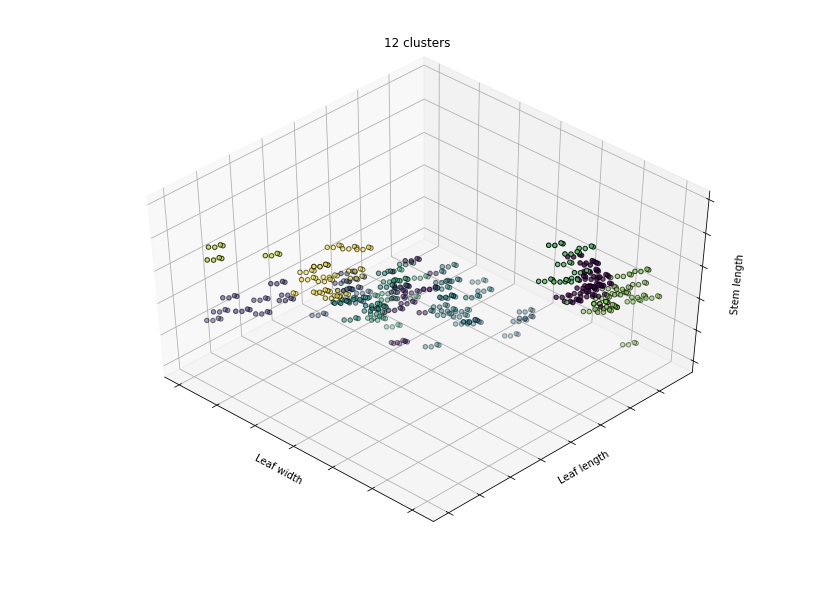

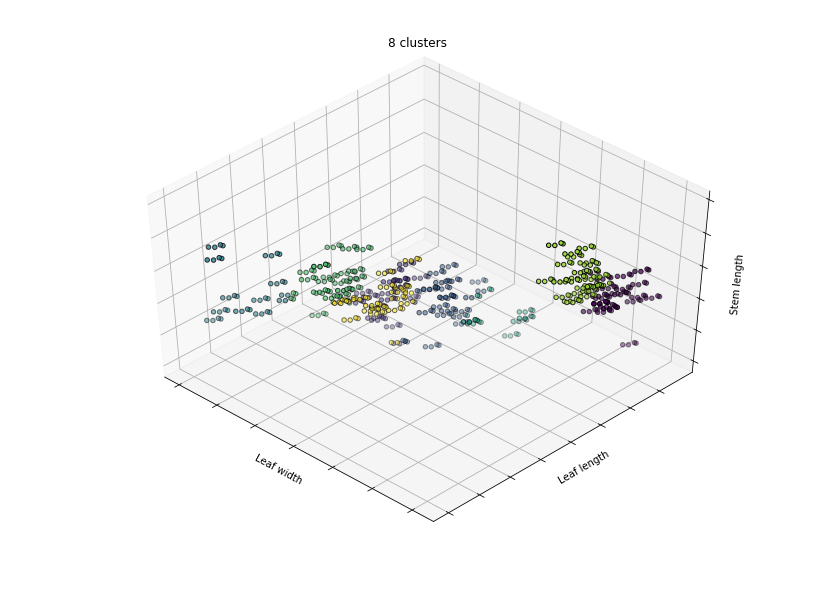

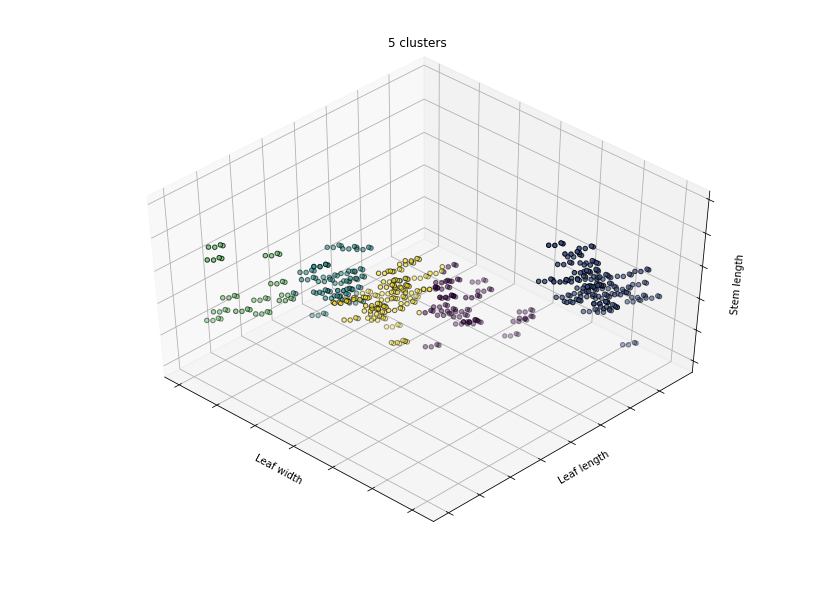

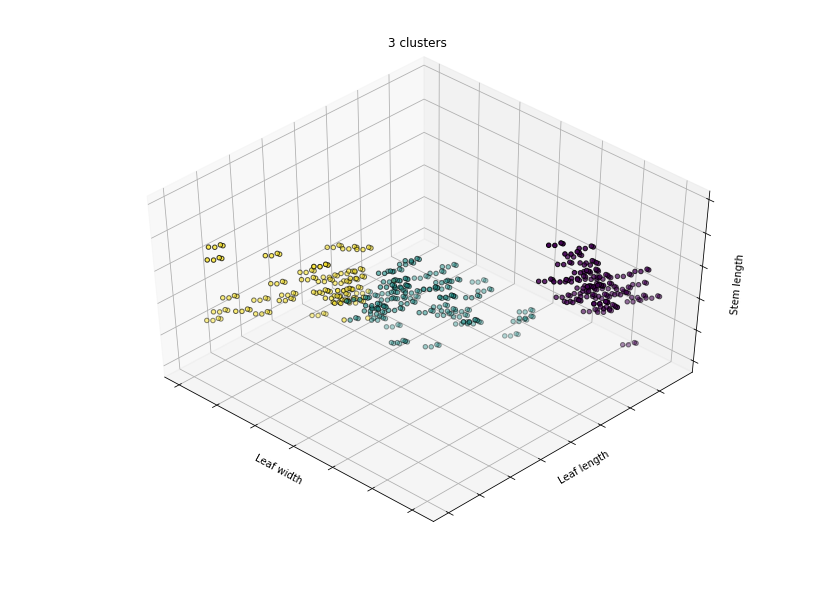

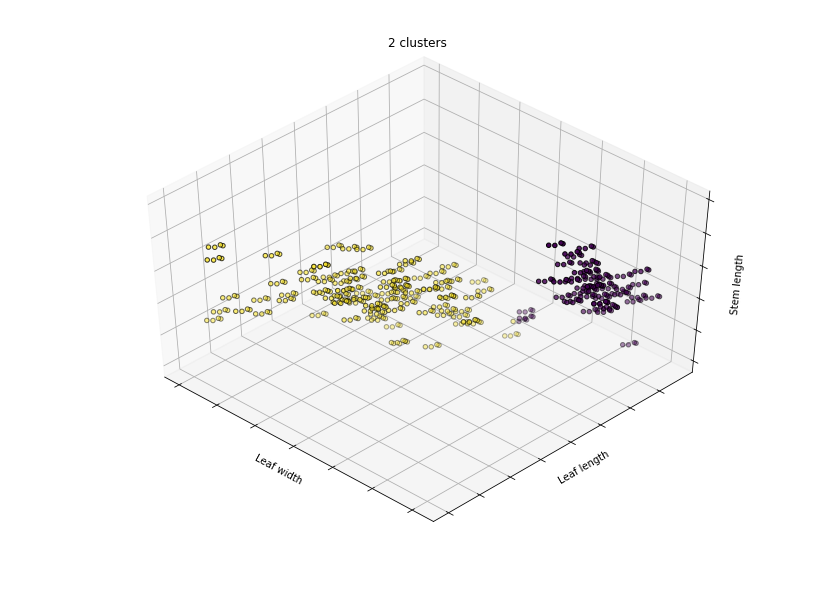

In [9]:
fignum = 1
titles = ['16 clusters', '12 clusters', '8 clusters', '5 clusters', '3 clusters', '2 clusters']
titlesfig = ['C16', 'C12', 'C08', 'C05', 'C03', 'C02']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X['F03'], X['F01'], X['F02'],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Leaf width')
    ax.set_ylabel('Leaf length')
    ax.set_zlabel('Stem length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    
    figname='Chapter-006-Example-003-%s-01.jpg' % (titlesfig[fignum - 1])
    
    imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06',figname])
    fig.savefig(imagename, bbox_inches='tight')
    
    fignum = fignum + 1
    
plt.show()

## Done

In [10]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-19 13:48:52.262531
